# Part 2-1: Discrete Velocity model
*E.Sirati, A.Rezaei*

---


As mentioned in *Part 1* there is a wave equation we want to solve. In this session we start solving the part2 of the equation below:

$\Large \underbrace {\frac{{{\partial ^2}U}}{{\partial {t^2}}}}_{Part3} = \underbrace {{V^2}(\frac{{{\partial ^2}}}{{\partial {x^2}}} + \frac{{{\partial ^2}}}{{\partial {z^2}}})U}_{Part2} + \underbrace {f(t)}_{Part1}$

Let's create a discrete velocity model. First, there are some parameters we need to adjust.
- dx : Grid Spacing in x direction (m)
- dz : Grid Spacing in z direction (m)
- nx : The number of grid points in x direction
- nz : The number of grid points in z direction
- Creating two 1D-Array in x and z directions in unit meter, so it will show x-axis and y-axis correctly in our plot.
    - Start Point is 0 and the final point is $nx*dx$ or $nz*dz$ in unit of meter and interval between grids is 10 meters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

dx = 10  # uint : m
dz = 10  # uint : m
nx = 100 # number of columns in our medium's matrix
nz = 100 # number of rows in our medium's matrix
X = np.arange(0 , nx*dx , dx)  # uint : m  ==> use this to show axises correctly when velocity model is plotted
Z = np.arange(0 , nz*dz , dz)  # uint : m  ==> use this to show axises correctly when velocity model is plotted

Now we can create a vlocity model using parameters above. At first we must create a homogeneous medium with velocity (e.g. 1500 *m/s*).

Initially, creat a "ones" matrix (a matrix where every element is equal to one) with size of nz in rows and nx in columns, and then multiply it with 1500.

To create such matrix we use *numpy.ones()* function. *ones* function takes only one input ( e.g. numpy.ones(X) ) and it creates a square matrix with number of rows and columns equal to X. To specify the number of rows and columns we can put them in another **()** and then give it to the function as one input.

In [2]:
#V = np.ones(nz,nx)*1500      # Using ones function in this manner is not possible beacuse it has two inputs right now.
V = np.ones( (nz,nx) )*1500   # Here (nx,nz) is given to function by using (). 1500 is the velocity [m/s].

Now let's look at what we have created. To show a matrix, we do not use "***plot*** " function, *plot* function is only used for 1D-arraies. For a 2D-array such as a Matrix, we need another function. We use ***imshow***  function from matplotlib.pyplot library (Remember to import the required library in the first lines of your code).

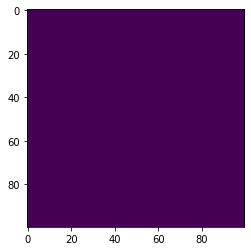

In [3]:
plt.imshow(V)

Again the y-axis and x-axis are not in unit of meter and they are showing the number of grids in each direction. To show it in meter unit we use our **X** and **Z** array, which we have created in the step 1.
*imshow(data, axies data)* takes two inputs. First one is data or the matrix we want to see, the second one is the min and max of **X** and **Z** array. We fill second input like this: " *extent =[X.min(), X.max(), Z.min(), Z.max()]* ".

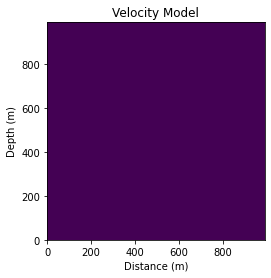

In [51]:
plt.imshow(V,extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')

--- 

As the output of every program is a plot/figure that shows us the result, learning how to plot or show the said figures is really important. Let's learn more about this matter.

But first let's start by learning how to create a multi layer velocity model by using " ***append()*** " function from numpy. ***numpy.append()*** takes two arraies as input and then appends the second array to the first one. *(Remember to fill the third input with axis = 0)*. If ,for example, you want to create a 3 layer velocity model you first need to create each layer separately and then append the first two, and then append the third one.

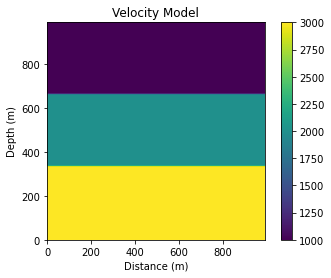

In [6]:
import matplotlib.pyplot as plt
import numpy as np
dx = 10  
dz = 10  
nx = 100
nz = 100
X = np.arange(0 , nx*dx , dx)  
Z = np.arange(0 , nz*dz , dz)  
        
    
layer1 = np.ones( (int(nz/3),nx) )*1000           # A 2D-array with size of 30 rows and nx columns ==> Vlocity 1000 m/s
layer2 = np.ones( (int(nz/3),nx) )*2000           # A 2D-array with size of 30 rows and nx columns ==> Vlocity 2000 m/s
layer3 = np.ones( (nz - 2*int(nz/3),nx) )*3000    # A 2D-array with size of 40 rows and nx columns ==> Vlocity 3000 m/s

layer1and2 = np.append(layer1, layer2 , axis=0)       # Appending first and second layers
V = np.append(layer1and2, layer3 , axis=0)            # Appending first two layers with the last layer


plt.imshow(V,extent =[X.min(), X.max(), Z.min(), Z.max()])          # Ploting
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')

plt.colorbar()   # Adding Colorbar

What is colorbar?
   - Colorbar is a separate axes which stands next to the figure, and can provide a guide to the meaning of colors in a plot.

We can add the colorbar to our figures by using " *colorbar()* " function.

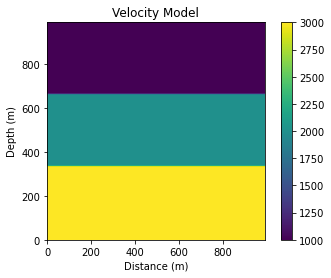

In [7]:
plt.imshow(V,extent =[X.min(), X.max(), Z.min(), Z.max()])          # Ploting
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')

plt.colorbar()   # Adding Colorbar

We can see that the color of our figure for the first layer is equal to 1000, for the second layer is 2000 and for the third layer is 3000 in the colorbar, so we can find out each pixel's value. Like the X-axis and Y-axis, we can choose a label for our colorbar too. First we need to assign a variable to *colorbar()* function (e.g. **q = plt.colorbar()** ). This means that the **q** variable has all of the properties of our colorbar and we can change or edit them. Every function has a lot of properties, sepecially imaging and plotting functions, we will come across the important ones in our work later on. In order to create a label for the colorbar we utilize *set_label* property of **q** ( e.g. **q.set_label()** ) and we put a string as the input.

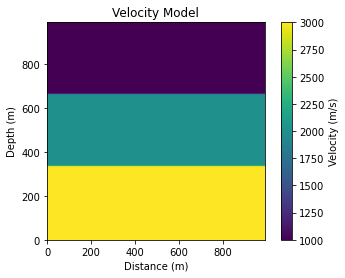

In [8]:
plt.imshow(V, extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')
q = plt.colorbar()            # Assign the properties of colorbar function to q variable

q.set_label('Velocity (m/s)')  # set_label() property takes a string input as the label of colorbar

What is the colormap?
- A colormap defines the colors for graphical objects such as images.

To change colormap of our figure we give another input to **imshow()** function as the second input, before specifying the axises. The second input must be something like ( **cmap = '*colormap_name*'** ). You can find all colormap names and colors in the link bellow.
www.matplotlib.org/stable/tutorials/colors/colormaps.html

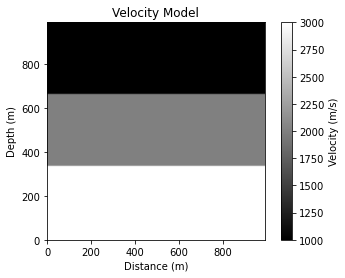

In [9]:
plt.imshow(V, cmap='gray', extent =[X.min(), X.max(), Z.min(), Z.max()])

plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')
q = plt.colorbar()
q.set_label('Velocity (m/s)')

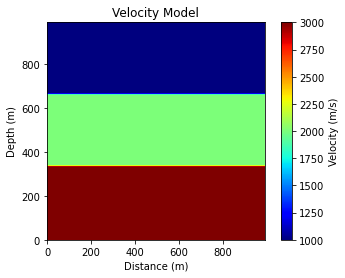

In [10]:
plt.imshow(V, cmap='jet', extent =[X.min(), X.max(), Z.min(), Z.max()])

plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')
q = plt.colorbar()
q.set_label('Velocity (m/s)')

## Multi figures
If we want to image or plot some figures in one frame right next to eachother, we can use " ***subplot()*** " function from matplotlib library. *subplot()* takes 3 inputs. The first and second input are the number of rows and columns in the frame and the third input indicates where the figures should be.

Text(0.5, 1.0, 'Velocity Model')

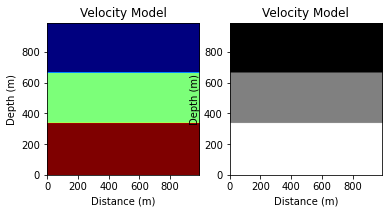

In [11]:
plt.subplot(1,2,1)   # Partitioning the frame into two bolcks for figures, one row and two columns
                     # and the third input indicates that the figure bellow should be place in first block.
plt.imshow(V, cmap='jet', extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')


plt.subplot(1,2,2)   # The same partitioning and the third input indicates that the figure bellow should be place in second block.
plt.imshow(V, cmap='gray', extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')

As you can see the two blocks overlap which is not good. To solve this issue we add a function at the end " ***tight_layout()*** " of matplotlib.

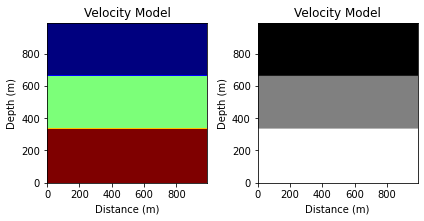

In [12]:
plt.subplot(1,2,1)                        
plt.imshow(V, cmap='jet', extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')


plt.subplot(1,2,2)   
plt.imshow(V, cmap='gray', extent =[X.min(), X.max(), Z.min(), Z.max()])
plt.xlabel('Distance (m)')
plt.ylabel('Depth (m)')
plt.title('Velocity Model')

plt.tight_layout()

Now they are seperated. Good job :)

--- 
### Assignment:

Create a 3 by 3 figure using subplot and in each figure places show a two layer velocity model, and use different colormaps for each of them (All of them must have x, y and colorbar label).

---


### Follow us
**Researchgate**:

https://www.researchgate.net/profile/Elahe-Sirati 

https://www.researchgate.net/profile/Arash-Rezaei-5 

**Github**:

https://github.com/ElaheSirati 

https://github.com/ArashRezaei 

### Contact us 

elaheh.sirati@yahoo.com 

arashrezaei@ut.ac.ir